In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# im = cv.imread('original_dfp/DeepFloorplan-master/output/reassembled/reassembled_E2_2.png')
im = cv.imread('SkeletonTrace/skeleton.png')
assert im is not None, "file could not be read, check with os.path.exists()"

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)


()


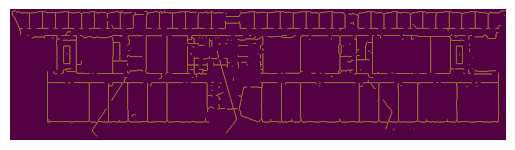

In [8]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(contours)

# Draw contours on the original image
import csv

# Assuming 'contours' is the array of contours obtained from cv.findContours
# And 'im' is the image on which you want to draw contours

# Draw contours on the original image
cv.drawContours(im, contours, -1, (0,255,0), 3)

# Display the image
plt.figure()
plt.imshow(im)
plt.axis('off')  # To turn off axis labels
plt.show()

# Open a CSV file in write mode
with open('contours.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    
    # Write contour points
    for i, contour in enumerate(contours):
        for j, point in enumerate(contour):
            x, y = point[0]
            writer.writerow([x, y])


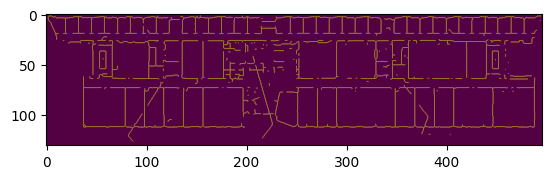

In [9]:
# Overlay each point in contours onto the image
for contour in contours:
    for point in contour:
        cv.circle(im, (point[0][0], point[0][1]), radius=1, color=(0, 0, 255), thickness=-1)

plt.figure()
plt.imshow(im)

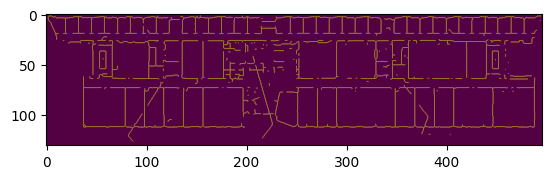

In [10]:
# Simplify contours to polygons and get junction points
junction_points = []
for contour in contours:
    epsilon = 0.005 * cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, epsilon, True)
    for point in approx:
        junction_points.append(point[0])

# Overlay junction points onto the image
for point in junction_points:
    cv.circle(im, (point[0], point[1]), radius=1, color=(0, 0, 255), thickness=-1)  # Green dots for visibility

plt.figure()
plt.imshow(im)